# Naïve Bayes Project: Predicción del rendimiento académico de estudiantes
## Elaborado por: Gabriel Carrizales
Fecha: 01/03/2025

### 1. Dataset
Los datos representan el rendimiento académico de estudiantes, incluyendo su género, edad,
horas de estudio, cursos en línea completados, tasa de asistencia, nivel de estrés y más.

> target = Final_Grade

> features = Age, Gender, Study_Hours_per_Week, Online_Courses_Completed, 
  Assignment_Completion_Rate (%), Attendance_Rate (%), Self_Reported_Stress_Level, 
  Time_Spent_on_Social_Media (hours/week), Sleep_Hours_per_Night, Preferred_Learning_Style



In [88]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools 

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Para preprocesamiento y modelo de Naïve Bayes
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 


### 2. Carga del Dataset .csv

In [90]:
# Cargar el dataset de rendimiento estudiantil
data = pd.read_csv('student_performance_large_dataset.csv')

# Mostrar la forma del dataset (filas, columnas)
print(f"Shape: {data.shape}")

# Mostrar las primeras filas para revisar la estructura
data.head()


Shape: (10000, 15)


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [92]:
df = pd.DataFrame(data)
df

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


### 3. Preparción del Datasheet

In [94]:
df.isnull().sum().to_frame('NaN value')

,NaN value
Student_ID,0
Age,0
Gender,0
Study_Hours_per_Week,0
Preferred_Learning_Style,0
Online_Courses_Completed,0
Participation_in_Discussions,0
Assignment_Completion_Rate (%),0
Exam_Score (%),0
Attendance_Rate (%),0


Buscar errores de sintaxis en las columnas o valores invalidos.

In [96]:
for col in df:
    print(f" {col}: {df[col].nunique()}")

 Student_ID: 10000
 Age: 12
 Gender: 3
 Study_Hours_per_Week: 45
 Preferred_Learning_Style: 4
 Online_Courses_Completed: 21
 Participation_in_Discussions: 2
 Assignment_Completion_Rate (%): 51
 Exam_Score (%): 61
 Attendance_Rate (%): 51
 Use_of_Educational_Tech: 2
 Self_Reported_Stress_Level: 3
 Time_Spent_on_Social_Media (hours/week): 31
 Sleep_Hours_per_Night: 7
 Final_Grade: 4


In [98]:
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,23.4788,3.461986,18.0,20.0,23.0,27.0,29.0
Study_Hours_per_Week,10000.0,27.1303,13.002547,5.0,16.0,27.0,38.0,49.0
Online_Courses_Completed,10000.0,10.0079,6.136726,0.0,5.0,10.0,15.0,20.0
Assignment_Completion_Rate (%),10000.0,74.9220,14.675437,50.0,62.0,75.0,88.0,100.0
Exam_Score (%),10000.0,70.1889,17.649447,40.0,55.0,70.0,85.0,100.0
Attendance_Rate (%),10000.0,75.0851,14.749251,50.0,62.0,75.0,88.0,100.0
Time_Spent_on_Social_Media (hours/week),10000.0,14.9365,9.022639,0.0,7.0,15.0,23.0,30.0
Sleep_Hours_per_Night,10000.0,6.9793,1.996965,4.0,5.0,7.0,9.0,10.0


### Descripción del Conjunto de Datos de Estudiantes

Este conjunto de datos contiene información sobre estudiantes, con un enfoque en su rendimiento académico y hábitos de estudio. Las características clave del conjunto de datos son:

- **Edad**: Los estudiantes tienen edades entre 18 y 29 años, lo que muestra un grupo relativamente joven y universitario. La distribución de edades es bastante homogénea, con la mayoría de los estudiantes en el rango de edad de 18 a 24 años.

- **Género**: La distribución de género es casi equilibrada, con una cantidad similar de estudiantes masculinos y femeninos.

- **Horas de Estudio por Semana**: Los estudiantes varían en el número de horas dedicadas al estudio, con un rango entre 8 y 48 horas de estudio semanal, lo que puede tener un impacto directo en su rendimiento académico.

- **Estilo de Aprendizaje Preferido**: Los estudiantes presentan diferentes estilos de aprendizaje: Kinesthetic, Reading/Writing, Auditory y Visual. Esta información puede ayudar a entender cómo el estilo de aprendizaje puede influir en el rendimiento académico.

- **Cursos en Línea Completados**: Indica la cantidad de cursos en línea completados por los estudiantes. Varía entre 0 y 20, lo que podría reflejar el interés y compromiso con el aprendizaje fuera del aula.

- **Participación en Discusiones**: La participación activa en discusiones en línea puede tener un impacto positivo en el aprendizaje. La columna indica si el estudiante participó o no en este tipo de actividades.

- **Tasa de Cumplimiento de Tareas**: Expresada en porcentaje, esta variable mide cuán comprometidos están los estudiantes con la entrega oportuna de tareas.

- **Calificación de Examen (%)**: Mide el desempeño de los estudiantes en los exámenes, con valores que varían entre 0 y 100.

- **Tasa de Asistencia (%)**: Indica el porcentaje de clases asistidas por los estudiantes, lo que podría tener una correlación directa con su rendimiento académico.

- **Uso de Tecnología Educativa**: Mide si el estudiante utiliza herramientas tecnológicas para su aprendizaje. Esto puede incluir plataformas educativas, aplicaciones o recursos en línea.

- **Nivel de Estrés Autoinformado**: Los estudiantes clasifican su nivel de estrés como Bajo, Medio o Alto. Esto podría afectar su rendimiento académico y bienestar general.

- **Tiempo Dedicado a Redes Sociales (horas/semana)**: Mide cuántas horas por semana dedica el estudiante a las redes sociales, lo cual podría influir en su productividad.

- **Horas de Sueño por Noche**: Las horas de descanso son fundamentales para el bienestar del estudiante y pueden afectar su capacidad para aprender y retener información.

- **Calificación Final**: La columna de `Final_Grade` contiene la calificación final del estudiante, que está categorizada en letras (A, B, C, D, F). Esta variable es crucial para evaluar el rendimiento general del estudiante.

### Observaciones Clave:
- **Estandarización**: Dado que las características de los estudiantes varían significativamente en sus rangos, como en el caso de las horas de estudio, calificaciones de exámenes, o tiempo en redes sociales, es necesario estandarizar estos datos para que tengan una contribución equitativa durante cualquier análisis estadístico o de machine learning.

- **Impacto de Variables**: Variables como el `Nivel de Estrés`, `Estilo de Aprendizaje`, `Horas de Sueño`, `Tasa de Asistencia`, y el `Uso de Tecnología Educativa` pueden tener una fuerte relación con el rendimiento académico de los estudiantes y deberían ser estudiadas en profundidad.



In [100]:
df.describe(include = [object]).T

,count,unique,top,freq
Student_ID,10000,10000,S00001,1
Gender,10000,3,Female,4846
Preferred_Learning_Style,10000,4,Visual,2523
Participation_in_Discussions,10000,2,Yes,5996
Use_of_Educational_Tech,10000,2,Yes,7022
Self_Reported_Stress_Level,10000,3,Medium,5015
Final_Grade,10000,4,A,2678


In [102]:
df.drop('Student_ID', axis=1, inplace=True)
df

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


In [104]:
df['Gender'] = df['Gender'].replace(['Male','Female'], [0,1])
df

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,18,1,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,29,1,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,20,1,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,23,1,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,19,1,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20,0,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,23,1,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,26,0,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,18,0,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


### 4. Análisis Exploratorio de Datos (EDA)

In [170]:
# Mapeo de las calificaciones finales a valores numéricos
grade_mapping = {
    'A': 90, 'B': 80, 'C': 70, 'D': 60, 'F': 50
}
df['Final_Grade_Numeric'] = df['Final_Grade'].map(grade_mapping)


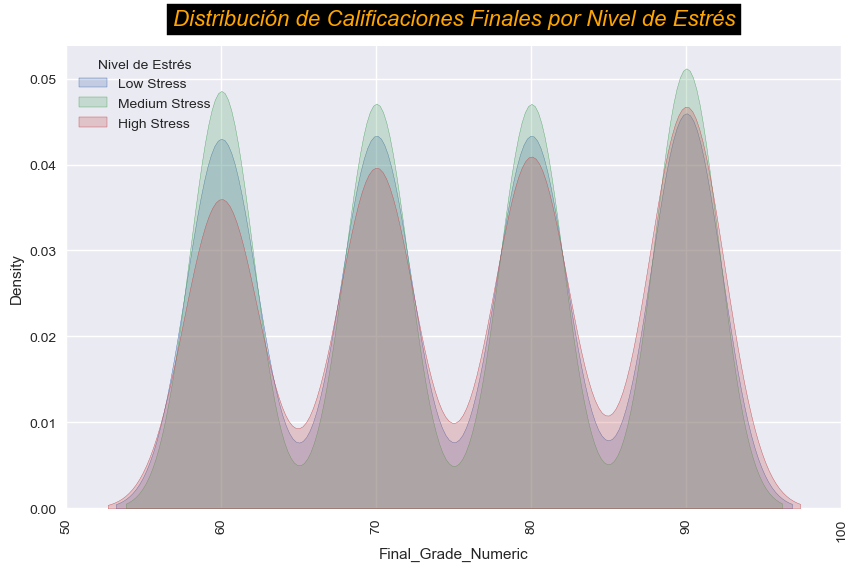

In [172]:
# Distribución de calificaciones finales por nivel de estrés
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Self_Reported_Stress_Level'] == 'Low', 'Final_Grade_Numeric'], label='Low Stress', fill=True)
sns.kdeplot(df.loc[df['Self_Reported_Stress_Level'] == 'Medium', 'Final_Grade_Numeric'], label='Medium Stress', fill=True)
sns.kdeplot(df.loc[df['Self_Reported_Stress_Level'] == 'High', 'Final_Grade_Numeric'], label='High Stress', fill=True)

# Personalización del gráfico
plt.title('Distribución de Calificaciones Finales por Nivel de Estrés', fontdict=font, pad=15)
plt.xticks(np.arange(0, 101, 10), rotation=90)
plt.xlim([50, 100])
plt.legend(title="Nivel de Estrés")
plt.show()

El **KDE plot (Kernel Density Estimate plot)** es un gráfico que muestra la densidad de una variable continua. Se usa para visualizar la distribución de los datos de una forma más suave que un histogram, ya que en lugar de agrupar los datos en bins. 
KDE emplea una función de suavizado (Kernel) para generar una curva continua. 

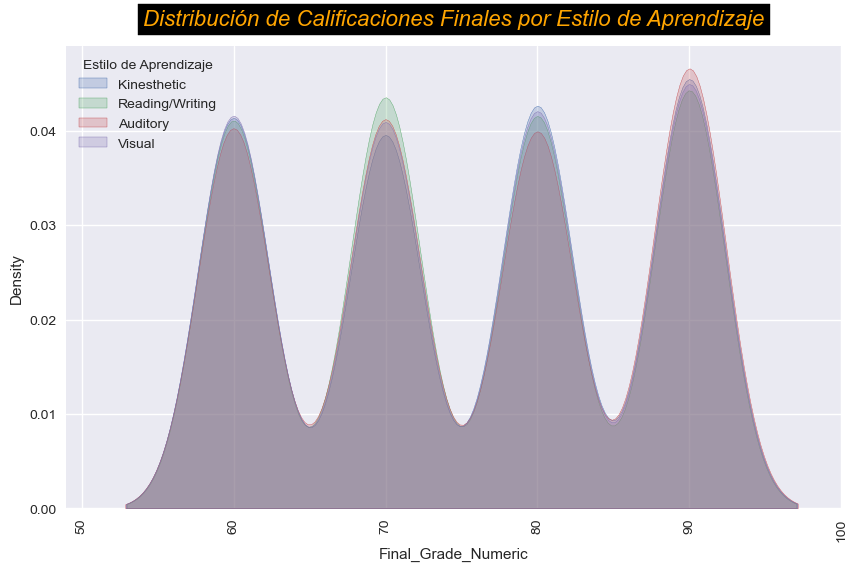

In [174]:
# Distribución de calificaciones finales por estilo de aprendizaje
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Preferred_Learning_Style'] == 'Kinesthetic', 'Final_Grade_Numeric'], label='Kinesthetic', fill=True)
sns.kdeplot(df.loc[df['Preferred_Learning_Style'] == 'Reading/Writing', 'Final_Grade_Numeric'], label='Reading/Writing', fill=True)
sns.kdeplot(df.loc[df['Preferred_Learning_Style'] == 'Auditory', 'Final_Grade_Numeric'], label='Auditory', fill=True)
sns.kdeplot(df.loc[df['Preferred_Learning_Style'] == 'Visual', 'Final_Grade_Numeric'], label='Visual', fill=True)

# Personalización del gráfico
plt.title('Distribución de Calificaciones Finales por Estilo de Aprendizaje', fontdict=font, pad=15)
plt.xticks(np.arange(0, 101, 10), rotation=90)
plt.xlim([49, 100])
plt.legend(title="Estilo de Aprendizaje")
plt.show()

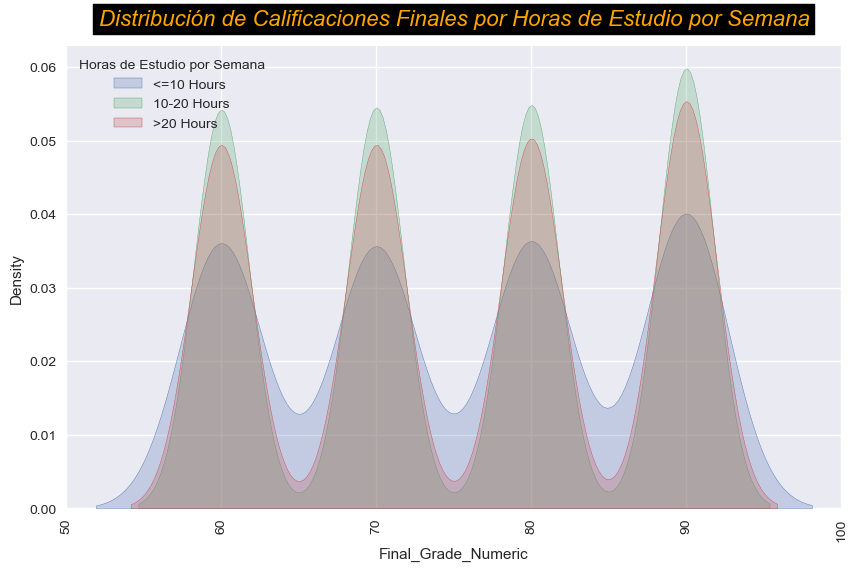

In [176]:
# Distribución de calificaciones finales por horas de estudio por semana
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Study_Hours_per_Week'] <= 10, 'Final_Grade_Numeric'], label='<=10 Hours', fill=True)
sns.kdeplot(df.loc[df['Study_Hours_per_Week'] > 10 & (df['Study_Hours_per_Week'] <= 20), 'Final_Grade_Numeric'], label='10-20 Hours', fill=True)
sns.kdeplot(df.loc[df['Study_Hours_per_Week'] > 20, 'Final_Grade_Numeric'], label='>20 Hours', fill=True)

# Personalización del gráfico
plt.title('Distribución de Calificaciones Finales por Horas de Estudio por Semana', fontdict=font, pad=15)
plt.xticks(np.arange(0, 101, 10), rotation=90)
plt.xlim([50, 100])
plt.legend(title="Horas de Estudio por Semana")
plt.show()

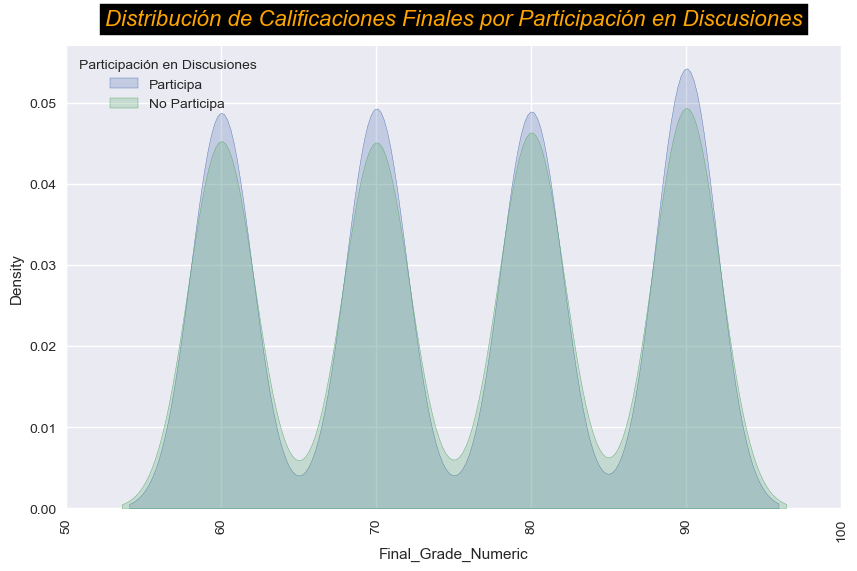

In [178]:
# Distribución de calificaciones finales por participación en discusiones
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Participation_in_Discussions'] == 'Yes', 'Final_Grade_Numeric'], label='Participa', fill=True)
sns.kdeplot(df.loc[df['Participation_in_Discussions'] == 'No', 'Final_Grade_Numeric'], label='No Participa', fill=True)

# Personalización del gráfico
plt.title('Distribución de Calificaciones Finales por Participación en Discusiones', fontdict=font, pad=15)
plt.xticks(np.arange(0, 101, 10), rotation=90)
plt.xlim([50, 100])
plt.legend(title="Participación en Discusiones")
plt.show()

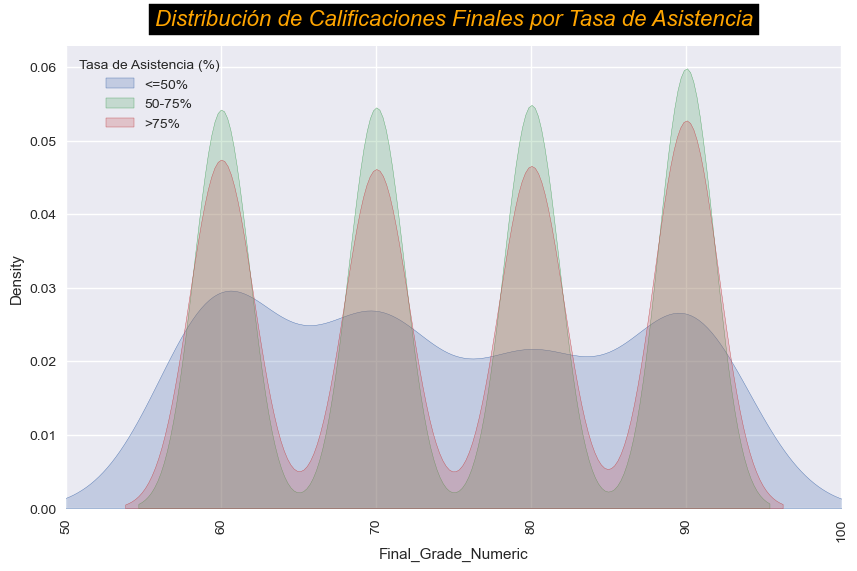

In [180]:
# Distribución de calificaciones finales por tasa de asistencia
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Attendance_Rate (%)'] <= 50, 'Final_Grade_Numeric'], label='<=50%', fill=True)
sns.kdeplot(df.loc[df['Attendance_Rate (%)'] > 50 & (df['Attendance_Rate (%)'] <= 75), 'Final_Grade_Numeric'], label='50-75%', fill=True)
sns.kdeplot(df.loc[df['Attendance_Rate (%)'] > 75, 'Final_Grade_Numeric'], label='>75%', fill=True)

# Personalización del gráfico
plt.title('Distribución de Calificaciones Finales por Tasa de Asistencia', fontdict=font, pad=15)
plt.xticks(np.arange(0, 101, 10), rotation=90)
plt.xlim([50, 100])
plt.legend(title="Tasa de Asistencia (%)")
plt.show()

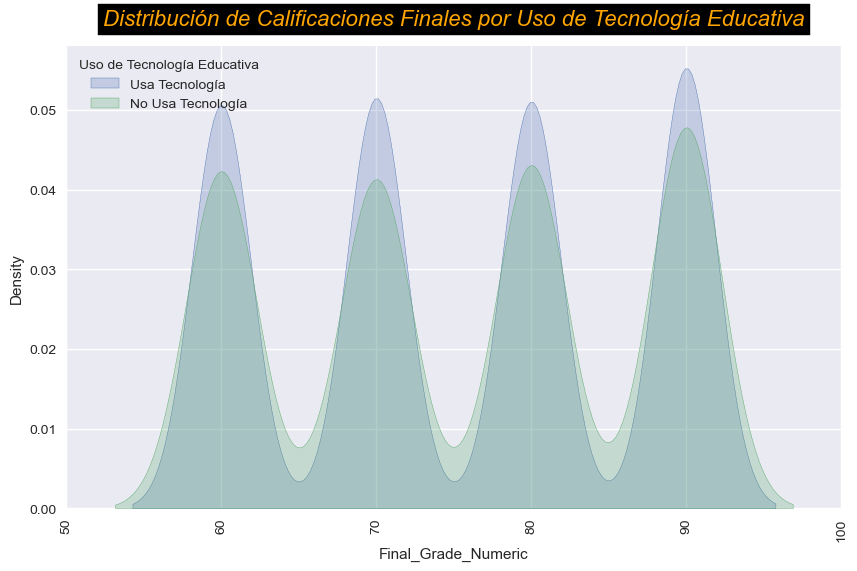

In [182]:
# Distribución de calificaciones finales por uso de tecnología educativa
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Use_of_Educational_Tech'] == 'Yes', 'Final_Grade_Numeric'], label='Usa Tecnología', fill=True)
sns.kdeplot(df.loc[df['Use_of_Educational_Tech'] == 'No', 'Final_Grade_Numeric'], label='No Usa Tecnología', fill=True)

# Personalización del gráfico
plt.title('Distribución de Calificaciones Finales por Uso de Tecnología Educativa', fontdict=font, pad=15)
plt.xticks(np.arange(0, 101, 10), rotation=90)
plt.xlim([50, 100])
plt.legend(title="Uso de Tecnología Educativa")
plt.show()

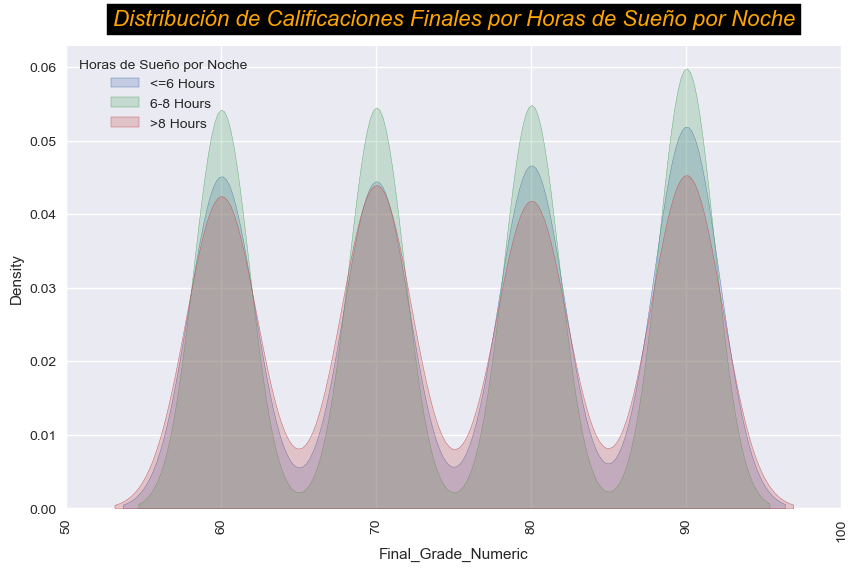

In [184]:
# Distribución de calificaciones finales por horas de sueño por noche
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Sleep_Hours_per_Night'] <= 6, 'Final_Grade_Numeric'], label='<=6 Hours', fill=True)
sns.kdeplot(df.loc[df['Sleep_Hours_per_Night'] > 6 & (df['Sleep_Hours_per_Night'] <= 8), 'Final_Grade_Numeric'], label='6-8 Hours', fill=True)
sns.kdeplot(df.loc[df['Sleep_Hours_per_Night'] > 8, 'Final_Grade_Numeric'], label='>8 Hours', fill=True)

# Personalización del gráfico
plt.title('Distribución de Calificaciones Finales por Horas de Sueño por Noche', fontdict=font, pad=15)
plt.xticks(np.arange(0, 101, 10), rotation=90)
plt.xlim([50, 100])
plt.legend(title="Horas de Sueño por Noche")
plt.show()

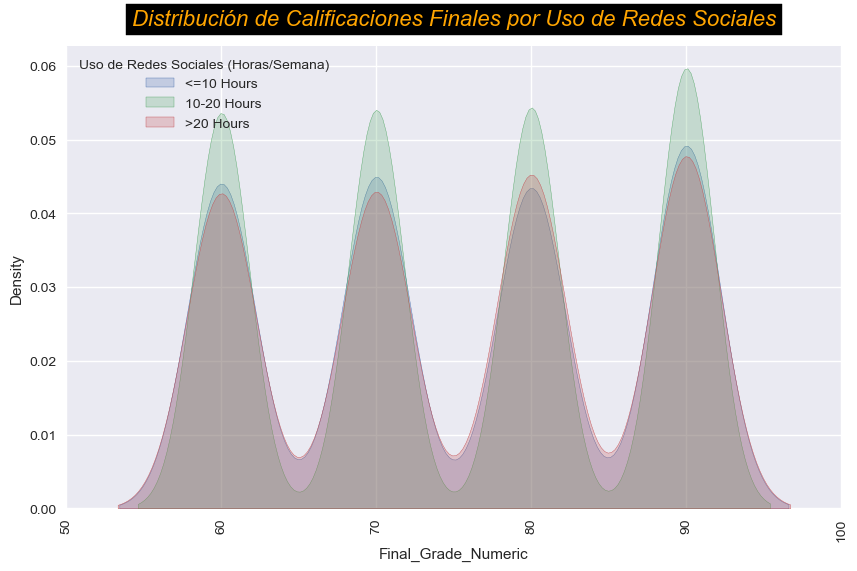

In [186]:
# Distribución de calificaciones finales por horas de uso de redes sociales
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Time_Spent_on_Social_Media (hours/week)'] <= 10, 'Final_Grade_Numeric'], label='<=10 Hours', fill=True)
sns.kdeplot(df.loc[df['Time_Spent_on_Social_Media (hours/week)'] > 10 & (df['Time_Spent_on_Social_Media (hours/week)'] <= 20), 'Final_Grade_Numeric'], label='10-20 Hours', fill=True)
sns.kdeplot(df.loc[df['Time_Spent_on_Social_Media (hours/week)'] > 20, 'Final_Grade_Numeric'], label='>20 Hours', fill=True)

# Personalización del gráfico
plt.title('Distribución de Calificaciones Finales por Uso de Redes Sociales', fontdict=font, pad=15)
plt.xticks(np.arange(0, 101, 10), rotation=90)
plt.xlim([50, 100])
plt.legend(title="Uso de Redes Sociales (Horas/Semana)")
plt.show()

### Análisis de Distribución de las Características de los Estudiantes

#### **1. Distribución de Horas de Estudio por Semana**
- En términos generales, **la mayoría de los estudiantes** tienen un número moderado de horas de estudio por semana, que varía entre **10 y 40 horas**. Aquellos que estudian entre **24 y 40 horas** a menudo tienen un **mejor rendimiento académico**, como se refleja en sus calificaciones finales.
- **Los estudiantes que estudian menos de 10 horas a la semana** tienden a obtener calificaciones más bajas y tienen una **menor tasa de finalización de tareas y participación en discusiones**.

#### **2. Estilo de Aprendizaje Preferido**
- **Los estudiantes kinestésicos y visuales** parecen ser los más comprometidos con su aprendizaje, completando más cursos en línea y participando activamente en discusiones.
- **Los estudiantes con estilo de aprendizaje auditivo y lectura/escritura** tienden a ser menos activos en el uso de tecnologías educativas y la participación en discusiones. Es posible que estos estudiantes necesiten **más apoyo en recursos interactivos**.

#### **3. Participación en Discusiones y Uso de Tecnología Educativa**
- **La mayoría de los estudiantes que participan en discusiones** también utilizan activamente herramientas educativas tecnológicas. Este grupo tiene **calificaciones finales más altas**, lo que sugiere que la participación en debates en línea y el uso de recursos educativos digitales tienen un impacto positivo en el rendimiento académico.
- Sin embargo, los estudiantes que no participan en discusiones y no usan tecnología educativa tienden a tener **calificaciones finales más bajas**, indicando que estos factores pueden ser importantes para el aprendizaje en línea.

#### **4. Nivel de Estrés Autoinformado**
- Los estudiantes que reportan un **nivel de estrés bajo o medio** tienden a tener un **rendimiento académico más alto**. Por el contrario, aquellos con un **nivel de estrés alto** suelen tener un **desempeño académico inferior**, lo que puede sugerir que el estrés tiene un efecto negativo en el rendimiento de los estudiantes.
- Este hallazgo resalta la importancia de la **gestión del estrés** en los estudiantes para un rendimiento académico óptimo.

#### **5. Edad y Rendimiento Académico**
- **Los estudiantes mayores de 23 años** tienen **mejores calificaciones finales** en comparación con los estudiantes más jóvenes (menores de 23 años), lo que podría reflejar **más experiencia académica** o mayor madurez en su enfoque hacia el estudio.
- Sin embargo, esto no es necesariamente indicativo de una tendencia general, ya que algunos estudiantes jóvenes con **altas tasas de asistencia y más horas de estudio** tienen un rendimiento igualmente alto.

#### **6. Género y Rendimiento Académico**
- En términos generales, **la distribución de género** no muestra una gran diferencia en el rendimiento académico, ya que tanto hombres como mujeres tienen **distribuciones de calificación similares**. Sin embargo, los **estudiantes femeninos** tienden a estar ligeramente más comprometidos con la **participación en discusiones y el uso de tecnología educativa** que los masculinos, lo que podría influir en su **rendimiento académico ligeramente superior**.
  
#### **7. Sueño y Rendimiento Académico**
- Los estudiantes que duermen **más de 7 horas por noche** tienden a tener un **mejor rendimiento académico**. Aquellos que duermen **menos de 6 horas por noche** tienden a obtener calificaciones **más bajas**, lo que resalta la importancia de un **sueño adecuado** para el aprendizaje y la retención de información.
  

### 4.1 Análisis univariable

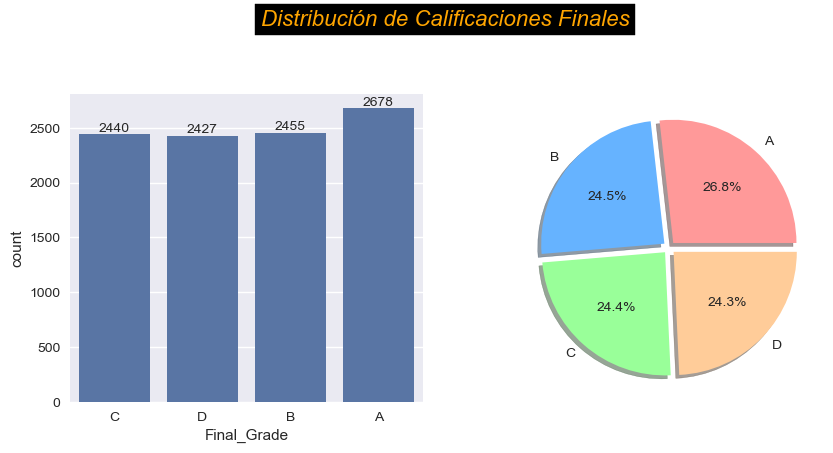

In [188]:
# Crear los subgráficos: 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico de barras: Conteo de calificaciones finales
sns.countplot(data=df, x='Final_Grade', ax=axes[0])
# Etiquetas de las barras
for container in axes[0].containers:
    axes[0].bar_label(container)

# Gráfico circular: Distribución de las calificaciones finales
slices = df['Final_Grade'].value_counts().values  # Contamos las ocurrencias de cada calificación
grades = df['Final_Grade'].value_counts().index  # Obtenemos las calificaciones
axes[1].pie(slices, labels=grades, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'], shadow=True, explode=[0.05]*len(grades), autopct='%1.1f%%')

# Título del gráfico general
plt.suptitle('Distribución de Calificaciones Finales', y=1.09, **font)

# Mostrar los gráficos
plt.show()


### 4.2 Análisis Bivariable

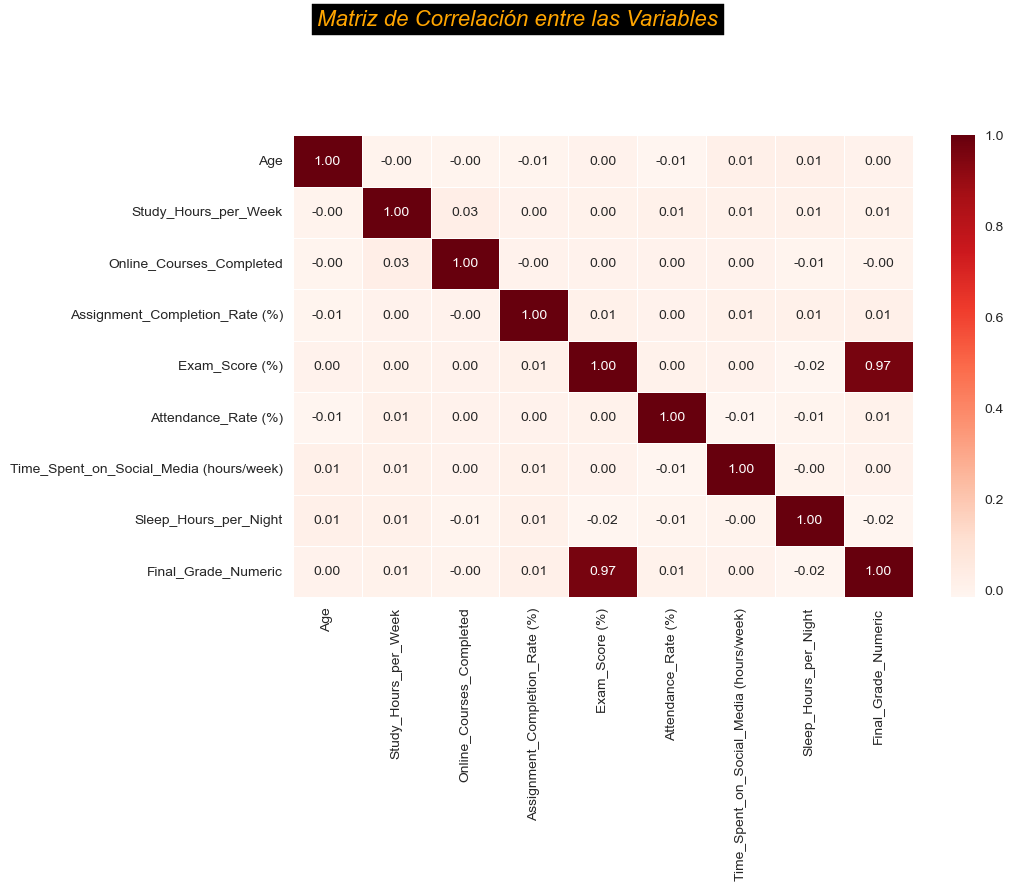

In [192]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=[float, int])

# Crear un heatmap de correlación entre las columnas numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), cmap='Reds', annot=True, fmt='.2f', linewidths=0.5)

# Título del gráfico
plt.suptitle('Matriz de Correlación entre las Variables', y=1.09, x=0.35, **font)

# Mostrar el gráfico
plt.show()


### 4.3 Análisis Multivariable

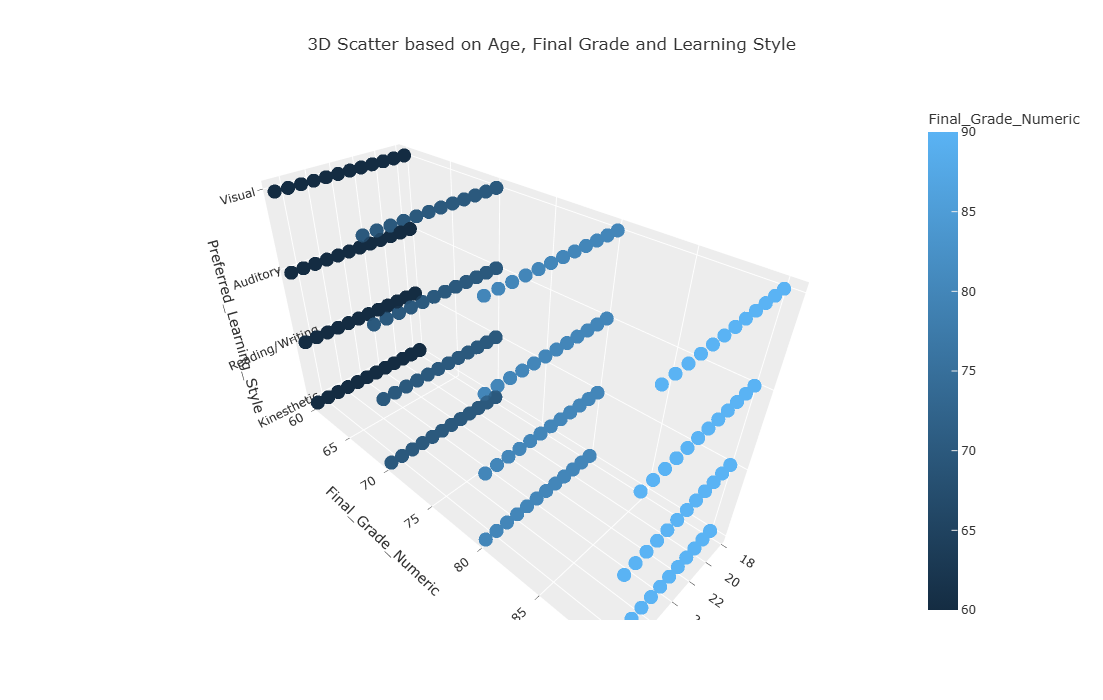

In [196]:
import plotly.express as px
import plotly.io as pio

# Ejemplo con Edad, Calificación Final y Estilo de Aprendizaje
fig = px.scatter_3d(
    data_frame=df,
    x='Age',
    y='Final_Grade_Numeric',
    z='Preferred_Learning_Style',
    color='Final_Grade_Numeric',
    template='ggplot2',
    opacity=0.6,
    height=700,
    title='3D Scatter based on Age, Final Grade and Learning Style'
)
pio.show(fig)
